<a href="https://colab.research.google.com/github/693080593/research/blob/master/3_Sets_%5B3%5D_cHB_RF_KFold_Var_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080620.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,85.50
30,30.9,27.3,0.0,0.0,32.7,0.0,9.1,41.00
60,13.3,25.5,0.0,0.0,38.7,0.0,0.0,27.10
90,6.5,65.2,0.0,0.0,20.7,0.0,8.0,38.00
120,1.9,23.4,66.4,0.0,8.0,0.0,0.0,23.60
150,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1.30
180,0.0,0.0,39.2,35.1,0.0,20.2,0.0,26.98
210,0.0,0.0,0.0,100.0,0.0,0.0,0.0,6.50


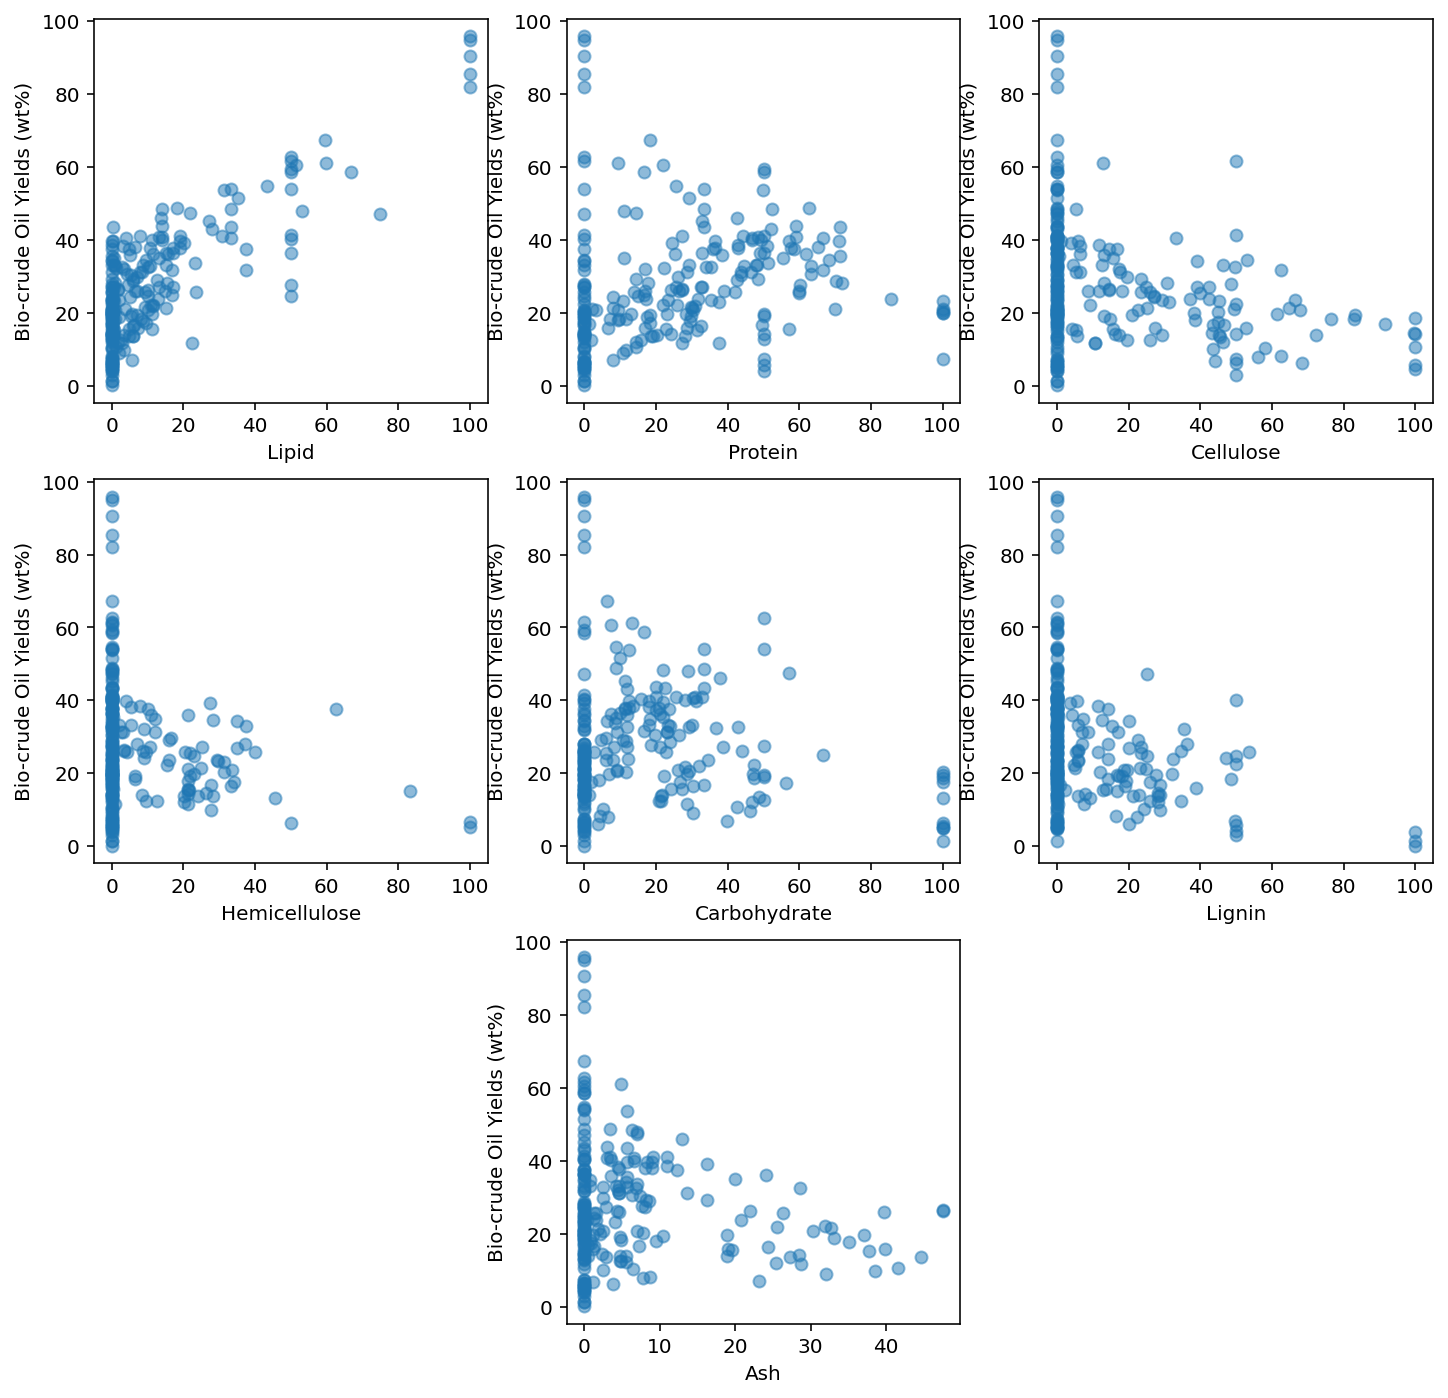

In [2]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

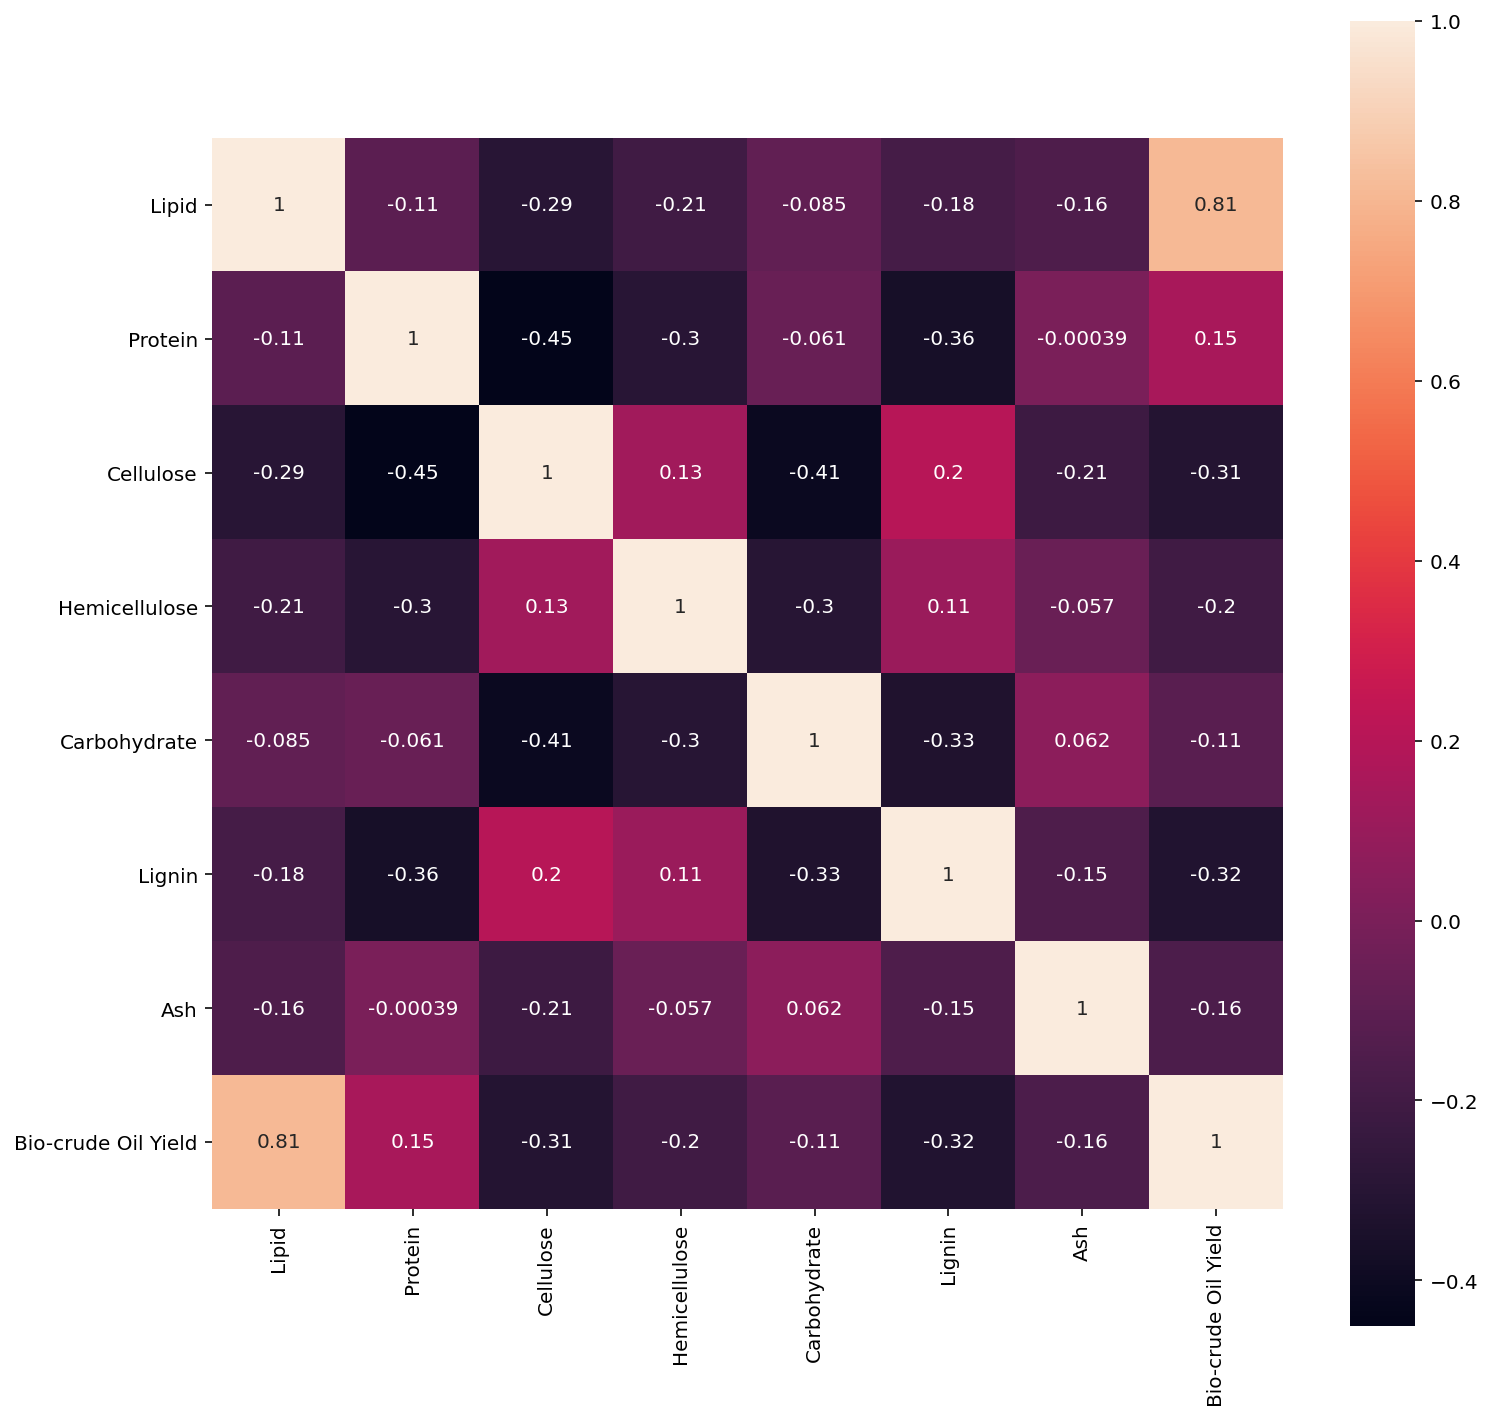

In [3]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [6]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use now.
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

In [ ]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = model.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Text(0.5, 1.0, 'y_pred vs. y_true')

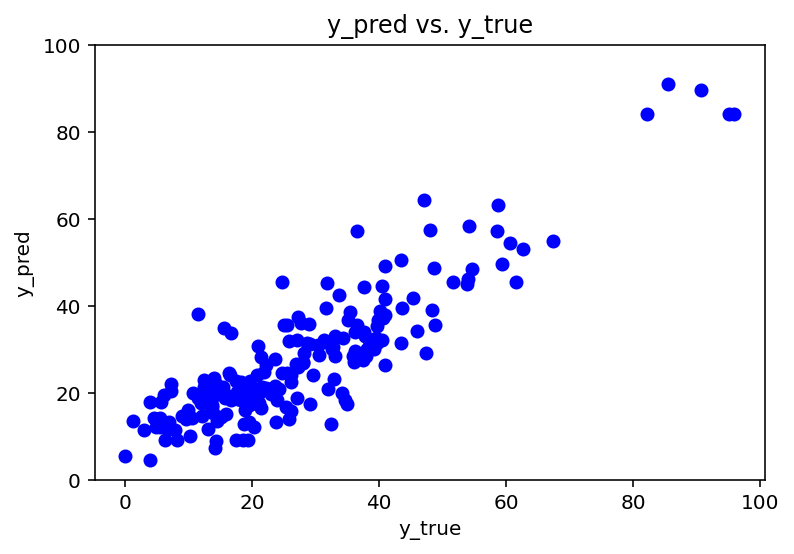

In [8]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

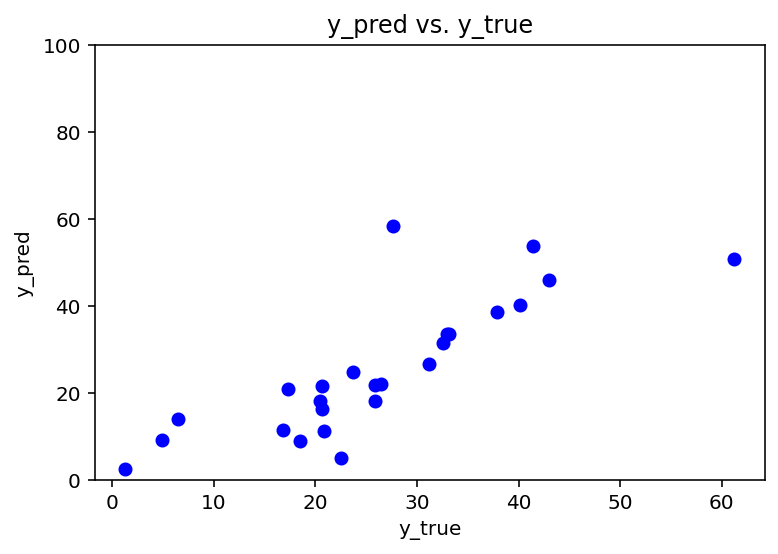

In [9]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 201, 10)

for i in range(10, 201, 10):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':i,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# max_depth 参数的最佳取值(1, 16, 2)

for i in range(1, 17, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':70,'max_depth':i,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# min_samples_leaf 参数的最佳取值(1, 42, 20)

for i in range(1, 42, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':70,'max_depth':3,'min_samples_leaf':i,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# min_samples_split 参数的最佳取值(2, 43, 20)

for i in range(2, 44, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':70,'max_depth':3,'min_samples_leaf':3,'min_samples_split':i,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# max_features 参数的最佳取值(1, 7, 1)

for i in range(1, 8, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':70,'max_depth':3,'min_samples_leaf':3,'min_samples_split':2,'max_features':i}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [20]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':70,'max_depth':3,'min_samples_leaf':3,'min_samples_split':2,'max_features':5}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = model.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 6.154623192742529
Standard deviation of MAE of training set 0.11662306022930731
Mean value of MAE of test set 7.432729817212232
Standard deviation of MAE of test set 1.0952808242977292

Mean value of RMSE of training set 7.627881862742983
Standard deviation of RMSE of training set 0.21767457914304036
Mean value of RMSE of test set 9.045226504196986
Standard deviation of RMSE of test set 1.4156563435896197

Mean value of R2 of training set 0.7983045547499088
Standard deviation of R2 of training set 0.03192516393589859
Mean value of R2 of test set 0.6946289467935314
Standard deviation of R2 of test set 0.06726815687984757

Mean value of MRE of training set 0.22305605467513287
Standard deviation of MRE of training set 0.005655432979428308
Mean value of MRE of test set 0.268406128864741
Standard deviation of MRE of test set 0.027695514708856464

Optimal model has MAE of valid set: 5.914772625707488
Optimal model has RMSE of valid set: 7.556989992786849
Opt

Text(0.5, 1.0, 'y_pred vs. y_true')

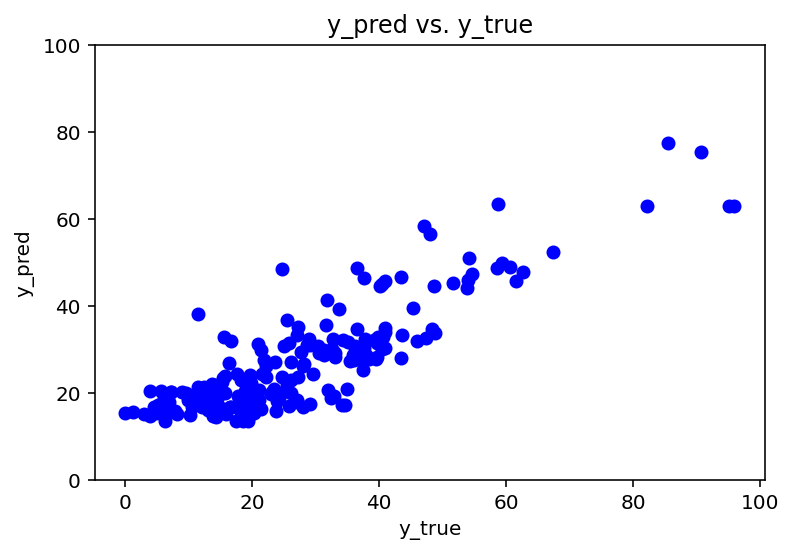

In [21]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

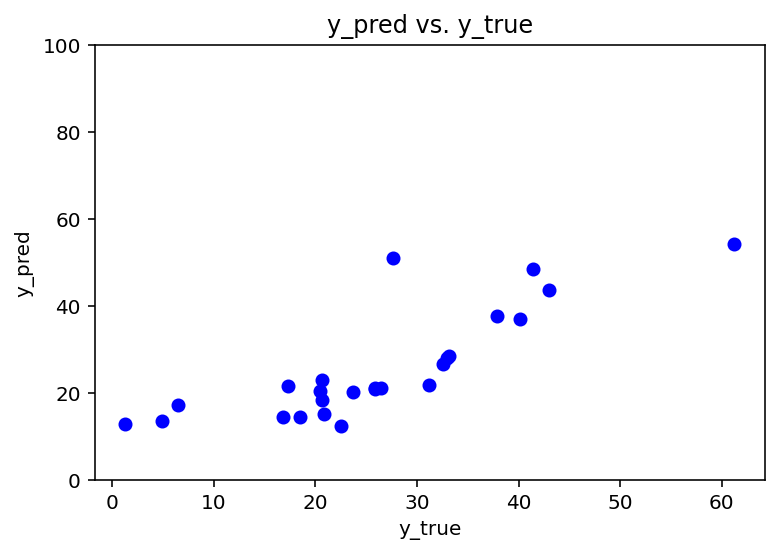

In [23]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

 1) Lipid                          0.796711
 2) Protein                        0.105570
 3) Lignin                         0.035265
 4) Cellulose                      0.021941
 5) Ash                            0.018273
 6) Hemicellulose                  0.011239
 7) Carbohydrate                   0.011001


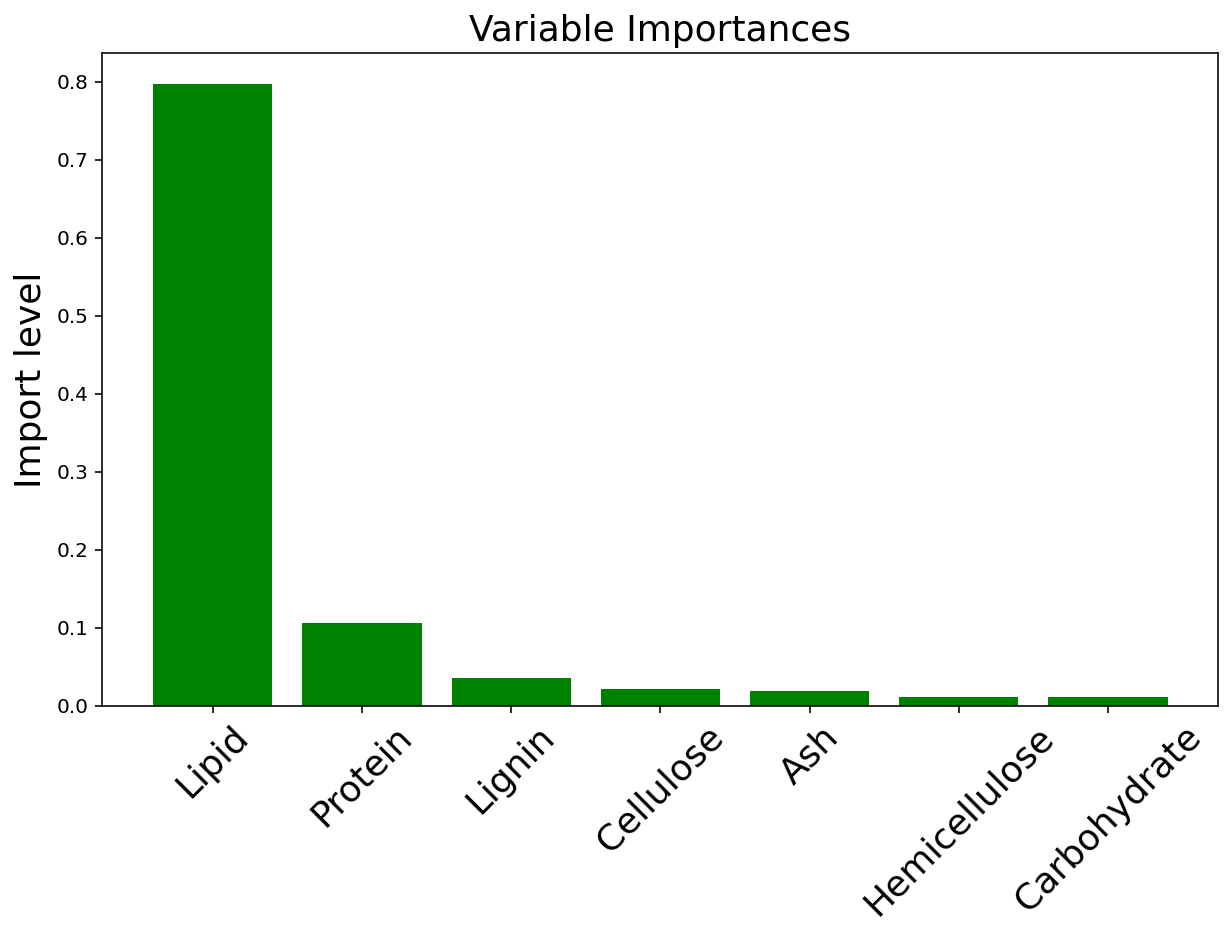

In [22]:
import matplotlib.pyplot as plt

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('Biocrude Yield RF Variable Importances.png')